In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_parquet('../data/yellow_tripdata_2023-01.parquet')

In [27]:
#Question 1. Downloading the data 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [29]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [30]:
#Question 2. Computing duration

In [31]:
df.duration.std()

42.59435124195458

In [32]:
# Question 3. Dropping outliers 

In [33]:
prev_len = len(df)

In [34]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [35]:
print(f'Number of records remaining: {1-(prev_len - len(df))/prev_len}')

Number of records remaining: 0.9812202822125979


In [13]:
# Question 4. One-hot encoding 

In [36]:
categorical = ['PULocationID', 'DOLocationID']
df[categorical] = df[categorical].astype(str)
train_dicts = df[categorical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
print(f'Feature matrix size: {X_train.shape}')

Feature matrix size: (3009173, 515)


In [37]:
target = 'duration'
y_train = df[target].values

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

print(f'Train RMSE: {mean_squared_error(y_train, y_pred, squared=False)}')

Train RMSE: 7.649261927686161


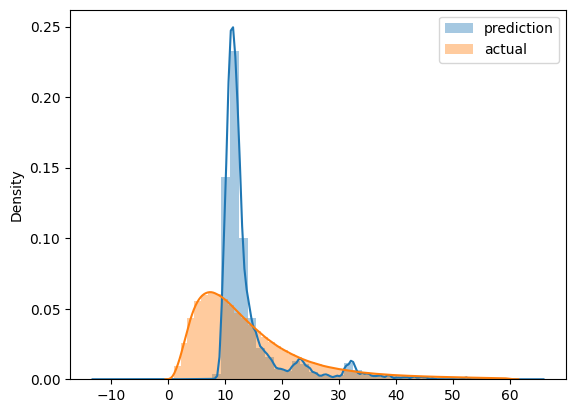

In [47]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend();

In [159]:
# Question 6. Evaluating the model. RMSE on validation 

In [19]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [54]:
df_val = read_dataframe('../data/yellow_tripdata_2023-02.parquet')

In [55]:
df_train = read_dataframe('../data/yellow_tripdata_2023-01.parquet')

In [22]:
# df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
# df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [62]:
df_train.shape

(3009173, 20)

In [58]:
train_dicts = df[categorical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
print(f'Feature matrix size: {X_train.shape}')

Feature matrix size: (3009173, 515)


In [60]:
val_dicts = df_val[categorical].to_dict(orient='records')
dv = DictVectorizer()
X_val = dv.fit_transform(val_dicts)
print(f'Feature matrix size: {X_val.shape}')

AttributeError: 'list' object has no attribute 'shape'

In [23]:
# categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
# numerical = ['trip_distance']

# dv = DictVectorizer()

# train_dicts = df_train[categorical + numerical].to_dict(orient='records')
# X_train = dv.fit_transform(train_dicts)

# val_dicts = df_val[categorical + numerical].to_dict(orient='records')
# X_val = dv.transform(val_dicts)

In [52]:
X_val.shape

(2855951, 514)

In [46]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_val)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

7.649261927686161

In [63]:
lr = LinearRegression()
lr.fit(X_val, y_val)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

ValueError: X has 514 features, but LinearRegression is expecting 515 features as input.

In [138]:
df_val.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
count,2.855951e+06,2855951,2855951,2.780802e+06,2.855951e+06,2.780802e+06,2.855951e+06,2.855951e+06,2.855951e+06,2.855951e+06,2.855951e+06,2.855951e+06,2.855951e+06,2.855951e+06,2.780802e+06,2.780802e+06,2.855951e+06
mean,1.729649e+00,2023-02-15 00:46:21.797722,2023-02-15 01:00:49.884340,1.351818e+00,3.783022e+00,1.436746e+00,1.172785e+00,1.771988e+01,1.569087e+00,4.907723e-01,3.342575e+00,4.767572e-01,9.847508e-01,2.634754e+01,2.306180e+00,9.192897e-02,1.446811e+01
min,1.000000e+00,2008-12-31 23:06:21,2008-12-31 23:31:24,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-7.540500e+02,-7.500000e+00,-5.000000e-01,-9.300000e+01,-5.275000e+01,-1.000000e+00,-7.575500e+02,-2.500000e+00,-1.250000e+00,1.000000e+00
25%,1.000000e+00,2023-02-08 08:37:20,2023-02-08 08:52:31.500000,1.000000e+00,1.080000e+00,1.000000e+00,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.560000e+01,2.500000e+00,0.000000e+00,7.366667e+00
50%,2.000000e+00,2023-02-14 22:30:30,2023-02-14 22:44:24,1.000000e+00,1.790000e+00,1.000000e+00,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.800000e+00,0.000000e+00,1.000000e+00,2.016000e+01,2.500000e+00,0.000000e+00,1.181667e+01
75%,2.000000e+00,2023-02-22 08:42:15.500000,2023-02-22 08:56:45,1.000000e+00,3.260000e+00,1.000000e+00,1.000000e+00,1.980000e+01,2.500000e+00,5.000000e-01,4.200000e+00,0.000000e+00,1.000000e+00,2.837000e+01,2.500000e+00,0.000000e+00,1.860000e+01
max,6.000000e+00,2023-03-07 13:01:28,2023-03-07 13:11:17,9.000000e+00,3.350043e+05,9.900000e+01,4.000000e+00,9.100000e+02,2.080000e+01,4.000000e+00,4.829000e+02,1.099000e+02,1.000000e+00,9.110000e+02,2.750000e+00,1.250000e+00,6.000000e+01
std,4.468684e-01,NaN,NaN,8.883535e-01,2.709347e+02,6.185343e+00,5.116005e-01,1.580587e+01,1.784592e+00,8.971338e-02,3.633155e+00,1.926315e+00,1.697799e-01,2.009956e+01,7.249386e-01,3.300188e-01,1.006423e+01


In [148]:
# Align columns of X_val with X_train
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)

# Predict on validation data
y_val = df_val['duration']
y_val_pred = model.predict(X_val)

# Calculate RMSE on validation data
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"RMSE on validation data: {rmse_val:.2f}")

AttributeError: 'csr_matrix' object has no attribute 'reindex'